# Energy Systems MILP

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.0.5"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


The following case study considers three locations along with their fluctuating local demand, weather profiles (capacity factors), and resource (natural gas) prices.

The following processes are considered - 

- Modular nuclear reactors (ASMR)
- Proton Exchange Membrane Electrolyzers (PEM)
- Hydrogen Storage (H2_L_c/H2_L_d)
- Natural Gas Combined Cycle with 95% carbon capture (NGCC)
- Pumped Storage Hydropower (PSH/PSH_discharge)
- Lithium-ion batteries (LiI/LiI_discharge)
- Solar Photovoltaics (PV) 
- Wind Farms (WF)
- Steam Methane Reforming (SMR)
- SMR + Carbon Capture Utilization and Storage (SMRH)
- Hydrogen Fuel Cells (H2FC)
- Direct Air Capture (DAC)
- Offshore Aquifers (AQoff)

The stated processes utilize the following resources:

- Methane (CH4)
- Carbon Dioxide (CO2)
- CO2 in aquifer (CO2_AQoff)
- CO2 Captured from air (CO2_DAC)
- Vented CO2 (CO2_Vent)
- Hydrogen (H2)
- Water (H2O)
- Stored hydrogen (H2_L)
- Power stored in LiI (LiI_Power)
- Oxygen (O2)
- Power stored in PSH (PSH_Power)
- Power
- Solar
- Uranium
- Wind


## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods p

$\mathcal{B}$ - set of transport modes b

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}$ - set of temporal periods p

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

## MILP Formulation



\begin{equation}
    min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} \alpha \times Capex_{l,p,t} \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
    \sum_{b \in \mathcal{B}} \Big(\sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t} Trans^{in}_{b,l,l',r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t}Trans^{out}_{b,l,l',r,t} \Big)
\end{equation*}

\begin{equation*}
    + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
    Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
    P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    Trans^{in/out}_{b, l, l', r,t} \leq Trans^{max-in/out}_{b, l,l', r,t} \times X^B_{b,l,l',r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch} , (l,l') \in \mathcal{L}^2, b \in \mathcal{B} 
\end{equation}


\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} + \sum_{l' \in \mathcal{L} \cap {l}}Trans^{in}_{l,l',r,t} = \sum_{l' \in \mathcal{L} \cap {l}} Trans^{out}_{l,l',r,t} + Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
    \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
    S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Trans^{in/out}_{b,l,l',r,t} \in R_{\geq 0}
\end{equation}



In [68]:
horizon = 5

$\textbf{Import modules}$

In [69]:
import sys
sys.path.append('../../src')

In [70]:

from energiapy.components.result import Result
import pandas
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.material import Material
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.temporal_scale import TemporalScale
import numpy
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output


## Data Import

The following data is needed for the model

- solar and wind profiles : energiapy.fetch_nsrdb_data imports data from the NREL NSRDB database
- power demand : ERCOT for Houston
- Natural Gas prices: Henry Hub 


**Get Weather data**

The fetch_nsrdb function accesses the [National Solar Radiation Database (NSRDB)](https://nsrdb.nrel.gov/) hosted by NREL on a Amazon Web Services (AWS) cloud through the h5py module To access large datasets, an API key can be requested from NREL.

download data at any latitude longitude (globally) or state-county (because of repetition of county names) pairs within the US.

Skim and fetch data which match different specifications, e.g. wind data for collection point at the highest elevation in the county.

While HSDS allows you to splice datasets, the script allows you to also find means within ranges.

Arrange data in a dataframe for multiscale analysis, with the temporal indices as tuples. [Can be saved as .csv/.txt/.json/.pkl]

Here, we import solar data as dni and wind data as wind speed for most populated data point in Harris county (TX) and San Diego county (SD) at an hourly resolution

In [71]:
# weather_sandiego = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i , state='California',
#                                     county='San Diego', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# index = weather_sandiego.index
# weather_sandiego.index = pandas.to_datetime(weather_sandiego.index, utc = True)
# weather_sandiego.index = weather_sandiego.index.strftime('%m/%d/%Y, %r')
# weather_sandiego = weather_sandiego[~weather_sandiego.index.str.contains('02/29')]

# weather_houston = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i, state='Texas',
#                                    county='Harris', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
# weather_houston.index = weather_houston.index.strftime('%m/%d/%Y, %r')
# weather_houston = weather_houston[~weather_houston.index.str.contains('02/29')]

# weather_houston.to_csv('weather_houston.csv')
# weather_sandiego.to_csv('weather_sandiego.csv')


**OR**

Import from existing datasets. The data in this case has been downloaded from the NSRDB Viewer

In [72]:
s = 'LiI_Power_stored'
s.split("_")

['LiI', 'Power', 'stored']

In [73]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)


In [74]:

coord_sandiego = (32.77000045776367, -117.22000122070312)
weather_sandiego = pandas.read_csv('../data/weather_sandiego.csv', index_col=0)
weather_sandiego.index = pandas.to_datetime(weather_sandiego.index, utc = True)


In [75]:
df = weather_houston[['ghi']]
df.index = df.index - pandas.DateOffset(hours = 5)

In [76]:
df['date'] = df.index


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\1662085851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index


In [77]:
# df = pandas.read_csv('../data/ho_solar20.csv')
# df.columns = ['date', 'wind_speed', 'dni']
# df = df[['date', 'dni']]
# df.date = pandas.to_datetime(df.date)
# df.index = df['date']
hour = pandas.to_timedelta(df['date'].dt.hour, unit='H')
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\3731540251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\3731540251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\3731540251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [78]:
df_jan = df[(df['month'] == 1)&(df['year'] == 2020)]
df_apr = df[(df['month'] == 4)&(df['year'] == 2020)]
df_jul = df[(df['month'] == 7)&(df['year'] == 2020)]
df_oct = df[(df['month'] == 10)&(df['year'] == 2020)]

In [79]:
df_jan = df_jan.groupby(hour).mean()
df_apr = df_apr.groupby(hour).mean()
df_jul = df_jul.groupby(hour).mean()
df_oct = df_oct.groupby(hour).mean()

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\819404639.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_jan = df_jan.groupby(hour).mean()
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\819404639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_apr = df_apr.groupby(hour).mean()
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\819404639.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df

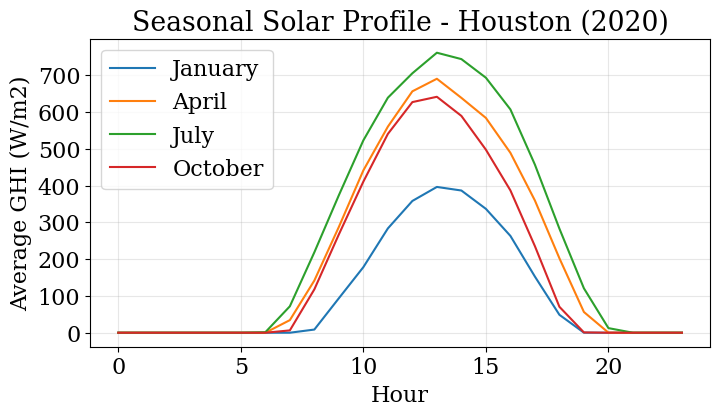

In [80]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(list(range(24)), df_jan['ghi'], label = 'January')
plt.plot(list(range(24)),df_apr['ghi'], label = 'April')
plt.plot(list(range(24)),df_jul['ghi'], label = 'July')
plt.plot(list(range(24)),df_oct['ghi'], label = 'October')
plt.ylabel("Average GHI (W/m2)")
plt.xlabel("Hour")
plt.title('Seasonal Solar Profile - Houston (2020)')
# plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.rcdefaults()

In [81]:
df_jul4 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 4)]
df_jul5 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 5)]
df_jul6 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 6)]
df_jul7 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 7)]
df_jul8 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 8)]


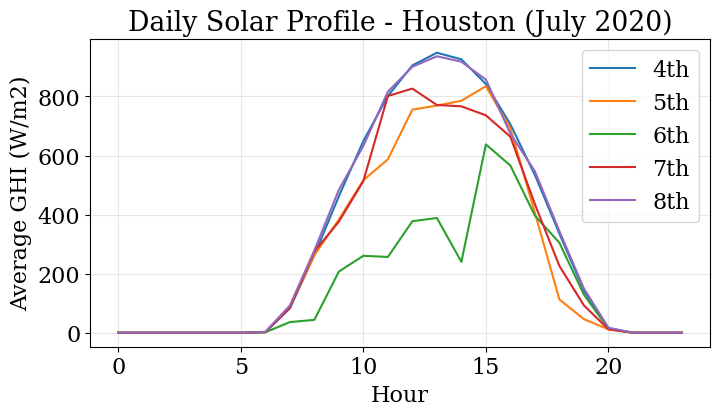

In [82]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(list(range(24)),df_jul4['ghi'], label = '4th')
plt.plot(list(range(24)),df_jul5['ghi'], label = '5th')
plt.plot(list(range(24)),df_jul6['ghi'], label = '6th')
plt.plot(list(range(24)),df_jul7['ghi'], label = '7th')
plt.plot(list(range(24)),df_jul8['ghi'], label = '8th')

plt.ylabel("Average GHI (W/m2)")
plt.xlabel("Hour")
plt.title('Daily Solar Profile - Houston (July 2020)')
# plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.rcdefaults()

In [83]:
df_jul416 = df[(df['month'] == 7)&(df['year'] == 2016)&(df['day'] == 4)]
df_jul417 = df[(df['month'] == 7)&(df['year'] == 2017)&(df['day'] == 4)]
df_jul418 = df[(df['month'] == 7)&(df['year'] == 2018)&(df['day'] == 4)]
df_jul419 = df[(df['month'] == 7)&(df['year'] == 2019)&(df['day'] == 4)]
df_jul420 = df[(df['month'] == 7)&(df['year'] == 2020)&(df['day'] == 4)]


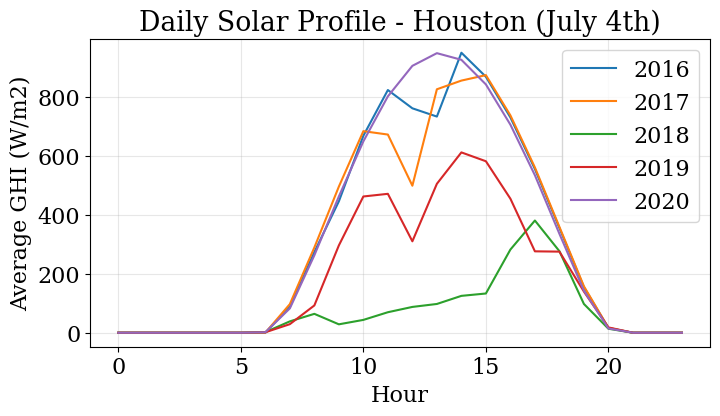

In [84]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(list(range(24)),df_jul416['ghi'], label = '2016')
plt.plot(list(range(24)),df_jul417['ghi'], label = '2017')
plt.plot(list(range(24)),df_jul418['ghi'], label = '2018')
plt.plot(list(range(24)),df_jul419['ghi'], label = '2019')
plt.plot(list(range(24)),df_jul420['ghi'], label = '2020')
plt.ylabel("Average GHI (W/m2)")
plt.xlabel("Hour")
plt.title('Daily Solar Profile - Houston (July 4th)')
# plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.rcdefaults()

## Calculate the solar and wind power outputs

In [85]:
solar_houston = solar_power_output(data= weather_houston, coord=coord_houston)
solar_sandiego = solar_power_output(data= weather_sandiego, coord=coord_sandiego)

In [86]:
wind_houston = wind_power_output(data= weather_houston)
wind_sandiego = wind_power_output(data= weather_sandiego)

In [87]:
from energiapy.utils.data_utils import min_max

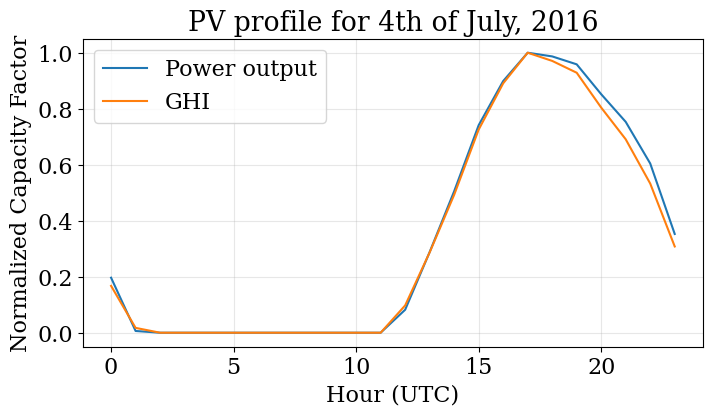

In [88]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(list(range(24)),min_max(solar_houston['PV_Power'][24*185:24*186]), label = 'Power output')
ax.plot(list(range(24)),min_max(weather_houston['ghi'][24*185:24*186]), label = 'GHI')
plt.ylabel("Normalized Capacity Factor")
plt.xlabel("Hour (UTC)")
plt.legend()
plt.title("PV profile for 4th of July, 2016")
plt.grid(alpha=0.3)
plt.rcdefaults()

c:\Users\cacodcar\energiapy\ki\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\cacodcar\energiapy\ki\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\cacodcar\energiapy\ki\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


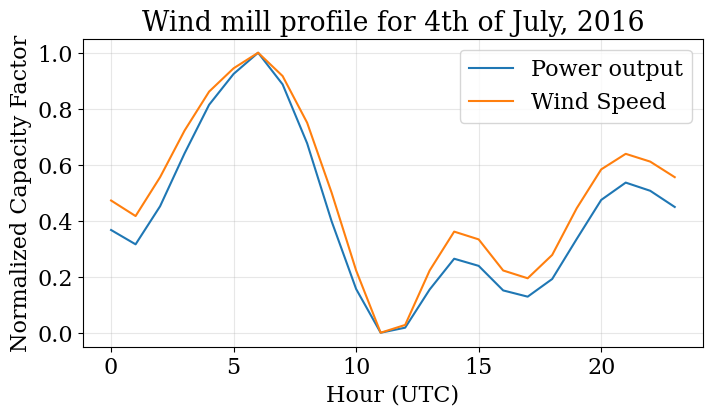

In [89]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(list(range(24)),min_max(wind_houston[24*185:24*186]), label = 'Power output')
ax.plot(list(range(24)),min_max(weather_houston['wind_speed'][24*185:24*186]), label = 'Wind Speed')
plt.ylabel("Normalized Capacity Factor")
plt.xlabel("Hour (UTC)")
plt.legend()
plt.title("Wind mill profile for 4th of July, 2016")
plt.grid(alpha=0.3)
plt.rcdefaults()

**import natural gas prices**

Natural gas prices are from the Henry price index at a daily temporal resolution.

The energia.make_henry_price_df function implicitly fills in gaps in data such as weekends and public holidays by repeating the last recorded prices For e.g. if the 4th of July will use the price for the 3rd of July a typical saturday and sunday will take the values for the last friday.

The stretch functionality stretches the values over the hourly temporal scale (8760) from a daily temporal scale (365), again through repetition.

Moreover, we can remove outliers usig the remove_outliers features in data_utils

In [90]:
ng_price_df = pandas.concat(
    [make_henry_price_df(file_name='../data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv', year=2016 +i) for i in range(5)])

**Import demand data**

Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region

In [91]:
# ercot = pandas.DataFrame(pandas.concat(
#     [pandas.read_excel(f'../data/Native_Load_{2016 + i}.xlsx')['COAST'] for i in range(5)]))
# ercot.index = index
# ercot.index = pandas.to_datetime(ercot.index, utc = True)
# ercot.index = ercot.index.strftime('%m/%d/%Y, %r')
# ercot = ercot[~ercot.index.str.contains('02/29')]
# ercot.to_csv('../data/ercot.csv')


In [92]:
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value

In [93]:
ercot['date'] = ercot.index
ercot['year'] = ercot.index.year

In [94]:
ercot2 = ercot.groupby('year')['COAST'].apply(list)

In [95]:
ercot_2016 = ercot[ercot['year'] == 2016]
ercot_2017 = ercot[ercot['year'] == 2017]
ercot_2018 = ercot[ercot['year'] == 2018]
ercot_2019 = ercot[ercot['year'] == 2019]
ercot_2020 = ercot[ercot['year'] == 2020]

ercot_2016m = ercot_2016.groupby(hour).mean()
ercot_2017m = ercot_2017.groupby(hour).mean()
ercot_2018m = ercot_2018.groupby(hour).mean()
ercot_2019m = ercot_2019.groupby(hour).mean()
ercot_2020m = ercot_2020.groupby(hour).mean()




C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\1188541800.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ercot_2016m = ercot_2016.groupby(hour).mean()
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\1188541800.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ercot_2017m = ercot_2017.groupby(hour).mean()
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\1188541800.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

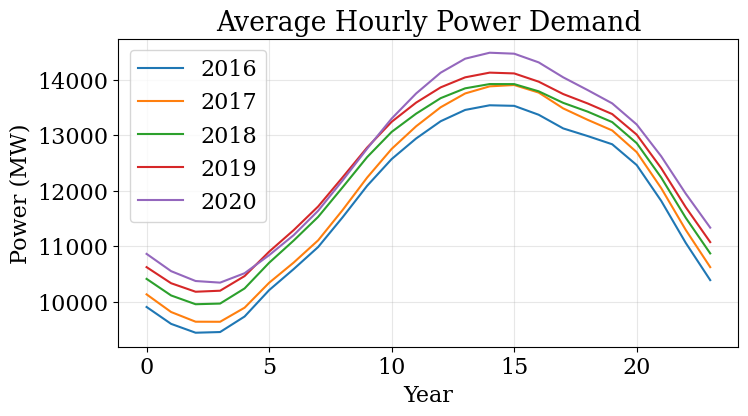

In [96]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(list(range(24)),ercot_2016m['COAST'], label = '2016')
ax.plot(list(range(24)),ercot_2017m['COAST'], label = '2017')
ax.plot(list(range(24)),ercot_2018m['COAST'], label = '2018')
ax.plot(list(range(24)),ercot_2019m['COAST'], label = '2019')
ax.plot(list(range(24)),ercot_2020m['COAST'], label = '2020')
plt.ylabel("Power (MW)")
plt.xlabel("Year")
plt.legend()
plt.title('Average Hourly Power Demand')
plt.grid(alpha=0.3)
plt.rcdefaults()

In [97]:
from statistics import mean
ercot_avg = [mean(ercot2[2016+i]) for i in range(5) ]

In [98]:
ercot_avg

[11699.168426442255,
 11930.906840785434,
 12164.573948968608,
 12354.094953188242,
 12521.446820117124]

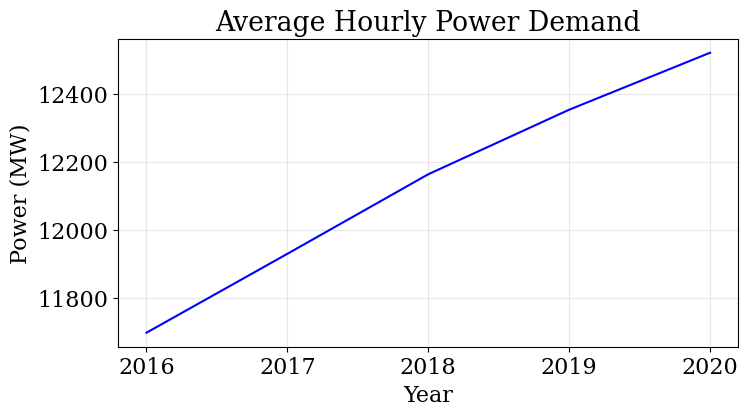

In [99]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
ax.plot([int(i+2016) for i in range(5)],ercot_avg, color = 'blue')
ax.set_xticks([int(i+2016) for i in range(5)])
ax.set_xticklabels([int(i+2016) for i in range(5)])
plt.ylabel("Power (MW)")
plt.xlabel("Year")
plt.title('Average Hourly Power Demand')
plt.grid(alpha=0.3)
plt.rcdefaults()

In [100]:
ercot3 = ercot.groupby(hour).mean()


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_19236\4135161346.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ercot3 = ercot.groupby(hour).mean()


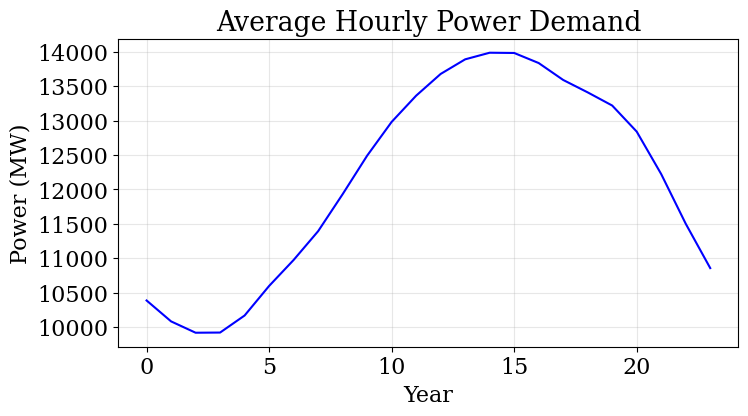

In [101]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(list(range(24)),ercot3['COAST'], color = 'blue')
# ax.set_xticks([int(i+2016) for i in range(5)])
# ax.set_xticklabels([int(i+2016) for i in range(5)])
plt.ylabel("Power (MW)")
plt.xlabel("Year")
plt.title('Average Hourly Power Demand')
plt.grid(alpha=0.3)
plt.rcdefaults()

In [102]:
ercot['date'] = ercot.index

**Technology cost data from NREL ATB**

NREL [Annual Technology Baseline (ATB)](https://atb.nrel.gov/) is a good source for technology cost and their expected trajectories. The annualy updated list categorizes trajectories based on the appetite for research and policy push and proposes three distinct scenarios:

- Advanced
- Moderate
- Conservative

The data for technologies not covered by ATB are drawn from literature. The trajectories for these technologies (mostly conventional) are set with only modest reduction rates as these have already stagnated in terms of cost, having witness generations of utility scale application; e.g. steam methane reforming (SMR). 

In [103]:
url = 'https://oedi-data-lake.s3.amazonaws.com/ATB/electricity/parquet/2022/ATBe.parquet'
raw_data = pandas.read_parquet(url)
raw_data = raw_data.astype(
    dtype={
        'core_metric_key': 'string',
        'core_metric_parameter': 'string',
        'core_metric_case': 'string',
        'crpyears': 'string',
        'technology': 'string',
        'technology_alias': 'string',
        'techdetail': 'string',
        'display_name': 'string',
        'scenario': 'string',
        'units': 'string'
    })


In [104]:
def atb_gttr(core_metric_parameters, core_metric_case, crpyear, technology, techdetail, scenario):
    df_out = pandas.DataFrame()
    for i in core_metric_parameters:
        df = pandas.DataFrame(raw_data[
            (raw_data.core_metric_parameter == i) &
            (raw_data.core_metric_case == core_metric_case) &
            (raw_data.crpyears == str(crpyear)) &
            (raw_data.technology == technology) &
            (raw_data.techdetail == techdetail) &
            (raw_data.scenario == scenario)
        ][['value']])
        df = df.rename({'value': i}, axis='columns')
        df = df.reset_index()
        df_out = pandas.concat([df_out, df], axis='columns')
        df_out = df_out.loc[:, ~df_out.columns.duplicated()].copy()
        df_out = df_out.fillna(0)
        df_out = df_out.drop(columns=['index'])
    return df_out


In [105]:

hig_trl_adv = [(1 - i/(31*15)) for i in range(31)]
hig_trl_mod = [(1 - i/(31*10)) for i in range(31)]
hig_trl_con = [(1 - i/(31*5)) for i in range(31)]

med_trl_adv = [(1 - i/(31*40)) for i in range(31)]
med_trl_mod = [(1 - i/(31*30)) for i in range(31)]
med_trl_con = [(1 - i/(31*20)) for i in range(31)]

low_trl_adv = [(1 - i/(31*70)) for i in range(31)]
low_trl_mod = [(1 - i/(31*50)) for i in range(31)]
low_trl_con = [(1 - i/(31*30)) for i in range(31)]

hig_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_adv, 'Fixed O&M': hig_trl_adv, 'Variable O&M': hig_trl_adv})
hig_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_mod, 'Fixed O&M': hig_trl_mod, 'Variable O&M': hig_trl_mod})
hig_trl_con_df = pandas.DataFrame(
    data={'CAPEX': hig_trl_con, 'Fixed O&M': hig_trl_con, 'Variable O&M': hig_trl_con})
med_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': med_trl_adv, 'Fixed O&M': med_trl_adv, 'Variable O&M': med_trl_adv})
med_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': med_trl_mod, 'Fixed O&M': med_trl_mod, 'Variable O&M': med_trl_mod})
med_trl_con_df = pandas.DataFrame(
    data={'CAPEX': med_trl_con, 'Fixed O&M': med_trl_con, 'Variable O&M': med_trl_con})
low_trl_adv_df = pandas.DataFrame(
    data={'CAPEX': low_trl_adv, 'Fixed O&M': low_trl_adv, 'Variable O&M': low_trl_adv})
low_trl_mod_df = pandas.DataFrame(
    data={'CAPEX': low_trl_mod, 'Fixed O&M': low_trl_mod, 'Variable O&M': low_trl_mod})
low_trl_con_df = pandas.DataFrame(
    data={'CAPEX': low_trl_con, 'Fixed O&M': low_trl_con, 'Variable O&M': low_trl_con})
constant_df = pandas.DataFrame(
    data={'CAPEX': [1]*31, 'Fixed O&M': [1]*31, 'Variable O&M': [1]*31})


param_list = ['CAPEX', 'Fixed O&M', 'Variable O&M']
advanced_dict = {
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Advanced'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Advanced'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Advanced'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Advanced'),
    'PSH_discharge': constant_df,
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Advanced'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_adv_df,
    'SMRH': hig_trl_adv_df,
    'AqOff': hig_trl_adv_df,
    'DAC': low_trl_adv_df,
    'PEM': low_trl_adv_df,
    'H2_L_c': med_trl_adv_df,
    'H2_L_d': constant_df
}


moderate_dict = {
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Moderate'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Moderate'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Moderate'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Moderate'),
    'PSH_discharge': constant_df,
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Moderate'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_mod_df,
    'SMRH': hig_trl_mod_df,
    'AqOff': hig_trl_mod_df,
    'DAC': low_trl_mod_df,
    'PEM': low_trl_mod_df,
    'H2_L_c': med_trl_mod_df,
    'H2_L_d': constant_df
}


conservative_dict = {
    'PV': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='UtilityPV', techdetail='Class1', scenario='Conservative'),
    'WF': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='LandbasedWind', techdetail='Class1', scenario='Conservative'),
    'LiI': atb_gttr(core_metric_parameters=param_list, core_metric_case='R&D', crpyear=30, technology='Commercial Battery Storage', techdetail='8Hr Battery Storage', scenario='Conservative'),
    'LII_discharge': constant_df,
    'PSH': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Pumped Storage Hydropower', techdetail='NatlClass10', scenario='Conservative'),
    'PSH_discharge': constant_df,
    # no cons, adv
    'ASMR': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='NuclearSMR', scenario='Moderate'),
    'NPP': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='Nuclear', techdetail='Nuclear', scenario='Conservative'),
    'NGCC': atb_gttr(core_metric_parameters=param_list, core_metric_case='Market', crpyear=30, technology='NaturalGas_FE', techdetail='CCCCSHFrame95%', scenario='Conservative'),
    'SMR': hig_trl_con_df,
    'SMRH': hig_trl_con_df,
    'AqOff': hig_trl_con_df,
    'DAC': low_trl_con_df,
    'PEM': low_trl_con_df,
    'H2_L_c': med_trl_con_df,
    'H2_L_d': constant_df
}


In [106]:
adv = advanced_dict['PV']['CAPEX']
mod = moderate_dict['PV']['CAPEX']
con = conservative_dict['PV']['CAPEX']


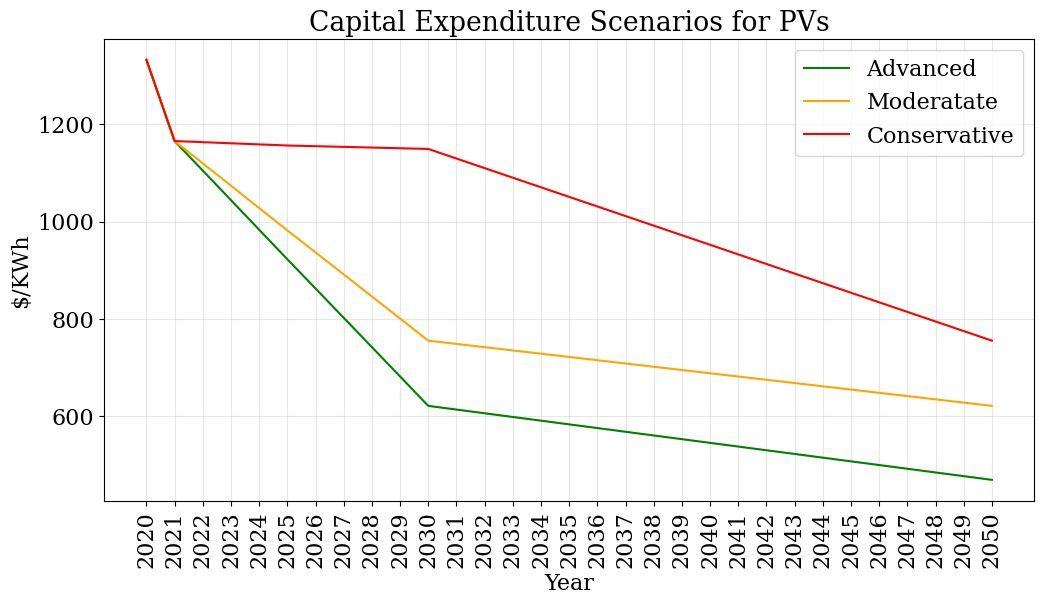

In [107]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(list(range(31)), adv, color = 'green', label = 'Advanced')
ax.plot(list(range(31)), mod, color = 'orange', label = 'Moderatate')
ax.plot(list(range(31)), con, color = 'red', label = 'Conservative')

ax.set_xticks([int(i) for i in range(31)])
ax.set_xticklabels([int(i+2020) for i in range(31)])
plt.ylabel("$/KWh")
plt.xlabel("Year")
plt.title('Capital Expenditure Scenarios for PVs')
plt.grid(alpha=0.3)
plt.xticks(rotation=90)
plt.legend()
plt.rcdefaults()

## Define temporal scale


The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.

In [108]:
scales = TemporalScale(discretization_list=[horizon, 365, 24])


**Big and small M**

In [109]:
bigM = 10**6
smallM = 10


## Declare resources

Resources can be consumed, produced, stored, discharged (or sold). Resources measured as mass (sparing Uranium) are quantified on a per metric ton basis, energy feedstock and resources us a Mega Watt (MW) basis.

- Power and Hydrogen (H2) have varying demands which are captured using deterministic data inputs
- Methane (CH4) has varying purchase price

In [110]:

Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated',
                 varying=[VaryingResource.DETERMINISTIC_DEMAND])

LiI_Power = Resource(name='LiI_Power', basis='MW',
                     label='Power in LiI', store_max=10000, store_min=smallM)

PSH_Power = Resource(name='PSH_Power', basis='MW',
                     label='Power in PSH', store_max=10000, store_min=smallM)


Uranium = Resource(name='Uranium', cons_max=bigM,
                   price=42.70/(250/2), basis='kg', label='Uranium')

H2 = Resource(name='H2', basis='tons', label='Hydrogen', demand=True, varying=[VaryingResource.DETERMINISTIC_DEMAND])

H2_L = Resource(name='H2_L', basis='tons', label='Hydrogen',
                block='Resource', store_max=10000, store_min=smallM)

CO2_AQoff = Resource(name='CO2_AQoff', basis='tons',
                     label='Carbon dioxide - sequestered', sell=True)

H2O = Resource(name='H2O', cons_max=bigM,
               price=0.001, basis='tons', label='Water', block='Resource')

CH4 = Resource(name='CH4', cons_max=bigM, price=1, basis='tons',
               label='Natural gas', varying=[VaryingResource.DETERMINISTIC_PRICE])

CO2 = Resource(name='CO2', basis='tons',
               label='Carbon dioxide', block='Resource')

CO2_Vent = Resource(name='CO2_Vent', sell=True, basis='tons',
                    label='Carbon dioxide - Vented')

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

CO2_DAC = Resource(name='CO2_DAC', basis='tons',
                   label='Carbon dioxide - captured')


$\textbf{Declare processes}$

Technology costs are derived from the NREL ATB and conversion factors are derived from literature.

- Solar photovoltaics (PVs) and wind farms (WFs) are subject to intermittent capacity rates

In [111]:

LiI = Process(name='LiI', conversion={Power: -1, LiI_Power: 1}, capex=3516428, fopex=87910,
              vopex=0, store_max=10000, store_min=smallM, prod_max=bigM, prod_min=smallM, label='Lithium-ion battery', basis='MW', block='energy_storage')

LiI_discharge = Process(name='LiI', conversion={Power: 1, LiI_Power: -1}, capex=0.1,
                        fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

WF = Process(name='WF', conversion={Wind: -1, Power: 1}, capex=1462000, fopex=43000, vopex=4953, land=30,
             prod_max=bigM, prod_min=smallM,  label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW', block='power_gen')

PV = Process(name='PV', conversion={Solar: -1, Power: 1}, capex=1333262, fopex=22623, vopex=0, land=50,
             prod_max=bigM, prod_min=smallM,  varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW', block='power_gen')

SMRH = Process(name='SMRH', conversion={Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 1.03, CO2: 9.332}, capex=2520000, fopex=945000, vopex=51.5,
               prod_max=bigM, prod_min=smallM,  label='Steam methane reforming + CCUS', block='h2_prod')

NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108, CO2_Vent: 0.297*0.05, CO2: 0.297 *
               0.95}, capex=2158928, fopex=53320, vopex=4090, prod_max=bigM, prod_min=smallM,  label='NGCC + 95% CC', block='power_gen')

SMR = Process(name='SMR', capex=2400, fopex=800, vopex=0.03,  conversion={
              Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 9.4979}, prod_max=bigM, prod_min=smallM,  label='Steam methane reforming', block='h2_prod')

H2FC = Process(name='H2FC', conversion={H2: -0.050, Power: 1}, capex=1.6 *
               10**6, vopex=3.5, fopex=0, prod_max=bigM, prod_min=smallM,  label='hydrogen fuel cell')

DAC = Process(name='DAC', capex=0.02536, fopex=0.634, vopex=0, conversion={
              Power: -0.193, H2O: -4.048, CO2_DAC: 1}, prod_max=bigM, prod_min=smallM,  label='Direct air capture', block='ccus')

PSH = Process(name='PSH', conversion={Power: -1, PSH_Power: 1},  capex=3924781,
              fopex=17820, vopex=512.5, prod_max=bigM, prod_min=smallM, store_min=smallM, store_max=1000, label='Pumped storage hydropower', basis='MW', block='energy_storage')

PSH_discharge = Process(name='LiI', conversion={Power: 1, PSH_Power: -1},  capex=0.1,
                        fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Pumped storage hydropower (d)', basis='MW')

H2_L_c = Process(name='H2_L_c', conversion={Power: -0.417, H2_L: 1, H2: -1}, capex=1.6 *
                 10**6, vopex=3.5, fopex=0, prod_max=bigM, prod_min=smallM,  label='Hydrogen geological storage', block='h2_store')

H2_L_d = Process(name='H2_L_d', conversion={H2_L: -1, H2: 1}, capex=0.01, vopex=0.001,
                 fopex=0, prod_max=bigM, prod_min=smallM,  label='Hydrogen geological storage discharge')

ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
               capex=7988951, fopex=0.04*0.730, vopex=0, prod_max=bigM, prod_min=smallM, label='Small modular reactors (SMRs)', block='power_gen')

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.01248, O2: 0.09987, H2O: -0.11235}, capex=1.55*10**6, fopex=0,
              vopex=0, prod_max=100, prod_min = 0.1, basis = 'tons', label = 'PEM' , block = 'h2_prod')

AqOff = Process(name='AqOff', conversion={Power: -1.28, CO2_AQoff: 1, CO2: -1}, capex=5.52,
                vopex=4.14, fopex=0, prod_max=bigM, prod_min=smallM,   label='Offshore aquifer CO2 sequestration (SMR)', block='ccus')



**Declare the set of processes to consider**

In [112]:
process_set = {LiI, WF, PV, SMRH, SMR, DAC,
               PEM, H2_L_c, H2_L_d, AqOff, PSH, NGCC}


**Import cost factors**

In the following case, we consider the *Advanced* scenario.

In [113]:
capex_factor = {i: pandas.DataFrame(
    advanced_dict[i.name][['CAPEX']][:horizon]) for i in process_set}
fopex_factor = {i: pandas.DataFrame(
    advanced_dict[i.name][['Fixed O&M']][:horizon]) for i in process_set}
vopex_factor = {i: pandas.DataFrame(
    advanced_dict[i.name][['Variable O&M']][:horizon]) for i in process_set}


**Declare location (houston)**

The following deterministic data inputs are provide:

1. demand factors for Power and Hydrogen (H2) at an hourly resolution (demand_scale_level = 2)
2. price factors for Methane (CH4) at a daily resolution (price_scale_level = 1)
3. capacity factors for solar photovoltaics (PV) and wind farms (WF) at an hourly resolution (capacity_scale_level = 2)
4. capex, fopex, and vopex factors at an annual resolution for all processes (expenditure_scale_level = 0)


In [114]:
houston = Location(name='HO', processes=process_set, capacity_factor={PV: solar_houston, WF: wind_houston}, demand_factor={Power: ercot[['COAST']]}, price_factor={
                   CH4: ng_price_df}, scales=scales, label='Houston', capex_factor=capex_factor, vopex_factor=vopex_factor, fopex_factor=fopex_factor, expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=1)


**Declare scenario**

The demand needs to be stated here for each resource at location.
energiapy handles demand not stated at a per location level by meeting the demand across all locations
Similarly, if resources are not stated the demand is met using all resources with demand (Process.demand = True). This does not make sense for resources with different basis but might be useful if the model needs to meet the demand for similar resources from different sources.

The scales need to be stated here to help generate the scenario:

1. expenditure scale level - technology expenditure decisions 
2. scheduling scale level - scheduling decisions such as production levels for process; purchase, discharge (sale), consumption, and inventory levels for resources  
3. network scale level - design of network i.e. the location and capacity sizing of production and storage facilities on a per unit basis
4. demand scale level - to meet the demand of a resource. Note that if this is higher than the scale for demand factor at location, energiapy will sum the demand across the lower scale
5. purchase scale level - purchase of resources that can be consumed. Needs to match the price scale level at location level

In [115]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=2,
                    network_scale_level=0, demand_scale_level=2, purchase_scale_level=1, label='full_case', demand={houston: {H2: 1000, Power: 1000}})


**Visualization of scenario data**

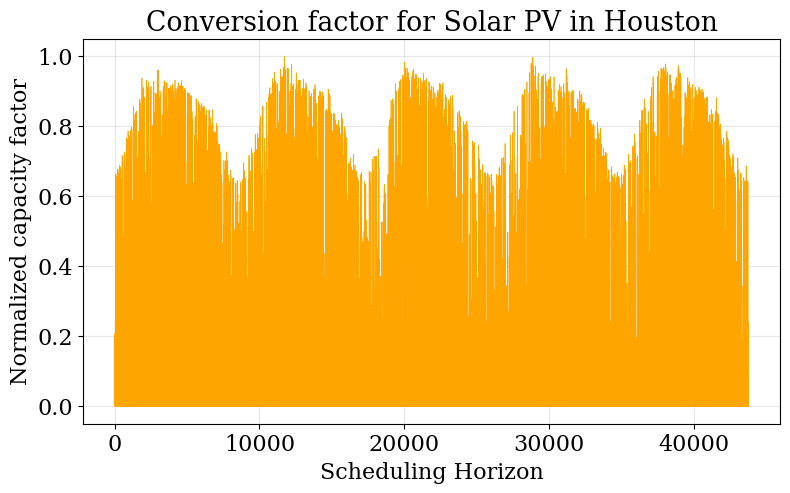

In [116]:

plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='orange')


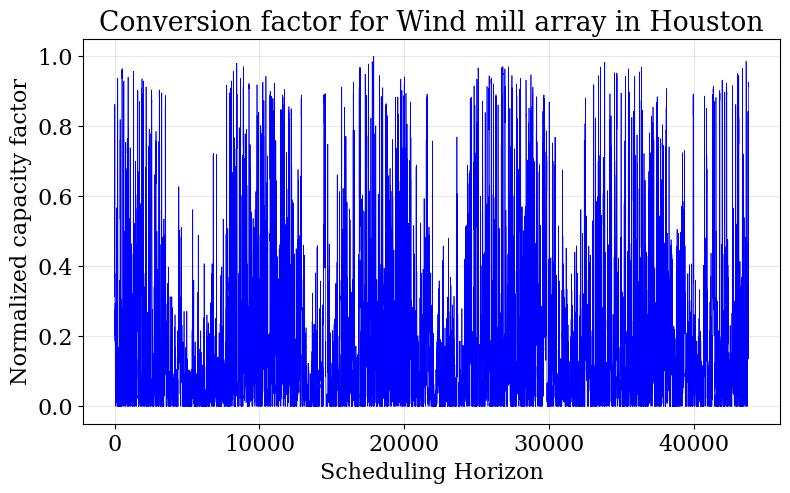

In [117]:

plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='blue')


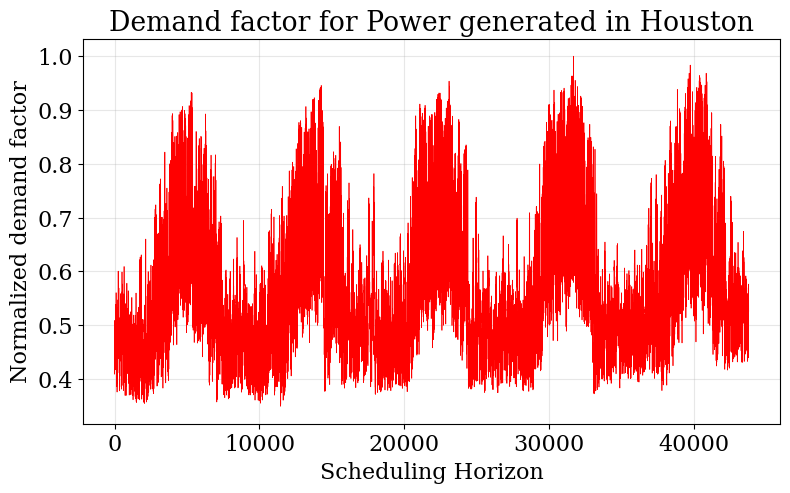

In [118]:

plot_scenario.demand_factor(
    scenario=scenario, location=houston, resource=Power, fig_size=(9, 5), color='red')


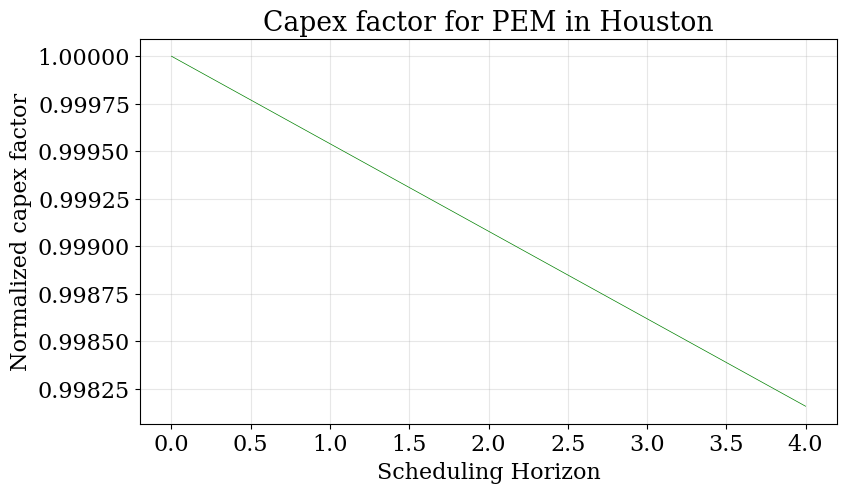

In [119]:

plot_scenario.capex_factor(
    scenario=scenario, location=houston, process=PEM, fig_size=(9, 5), color='green')


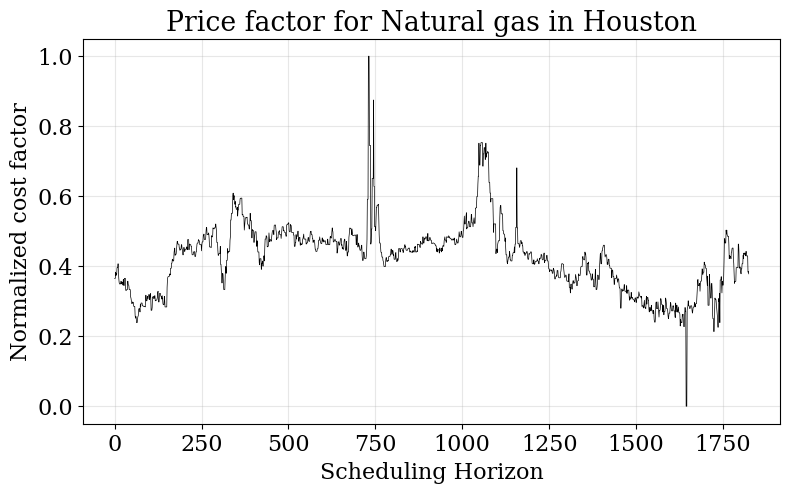

In [120]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=CH4, fig_size=(9, 5), color='black')


**Optimize for minimum cost**

In [121]:
milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK}, objective=Objective.COST)


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint location capex
constraint location fopex
constraint location vopex
constraint location incidental
constraint network capex
constraint network fopex
constraint network vopex
constraint network incidental
constraint nameplate inventory
constraint storage max
constraint storage min
constraint production mode
constraint nameplate production
constraint production max
constraint production min
constraint inventory balance
constraint resource consumption
constraint resource purchase
constraint location production
constraint location discharge
constraint location consumption
constraint location purchase
constraint network production
constraint network discharge
constraint network consumption
constraint network purchase
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost


In [122]:

results_cost = solve(scenario=scenario, instance=milp_cost, solver='gurobi',
                     name=f"results_slsp_cost", print_solversteps=True, saveformat='.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2190745 rows, 1884111 columns and 10351504 nonzeros
Model fingerprint: 0x98722ac4
Variable types: 1884036 continuous, 75 integer (75 binary)
Coefficient statistics:
  Matrix range     [2e-05, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+06]
Presolve removed 1301228 rows and 1301194 columns (presolve time = 5s) ...
Presolve removed 1553117 rows and 1421685 columns (presolve time = 10s) ...
Presolve removed 1563381 rows and 1431949 columns (presolve time = 15s) ...
Presolve removed 1563400 rows and 1431959 columns
Presolve time: 16.43s
Presolved: 627345 rows, 452152 columns, 1925056 nonzeros
Variable types: 452107 continuous, 45 integer (45 binary)
Determinist

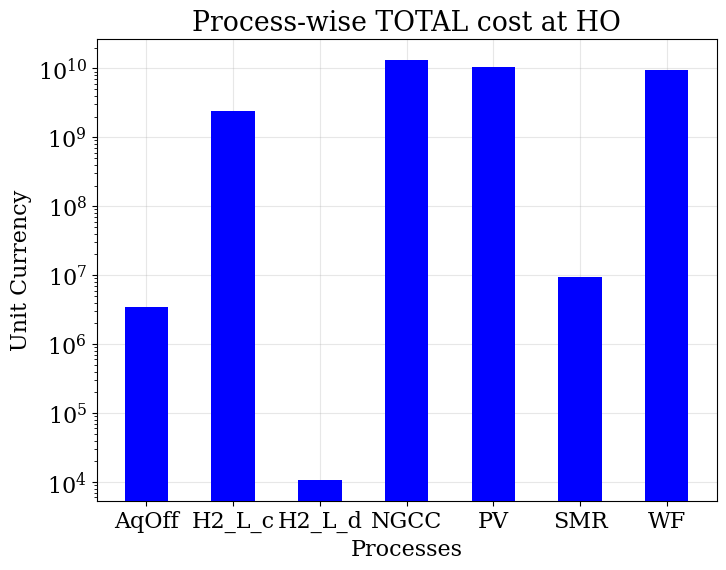

In [123]:
plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(8, 6))

![Total Costs](plots/total.png)

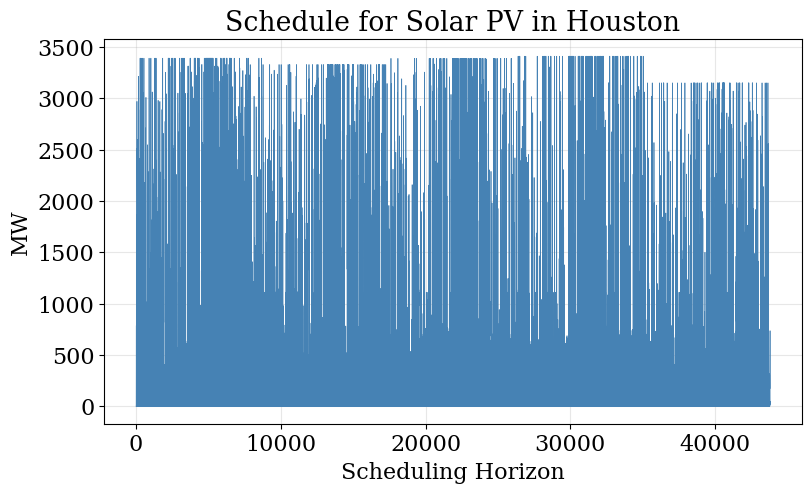

In [124]:

plot_results.schedule(results=results_cost, y_axis='P', component='PV',
                      location='HO', fig_size=(9, 5), color='steelblue')


![Schdule for ASMR](plots/sch_asmr.png)

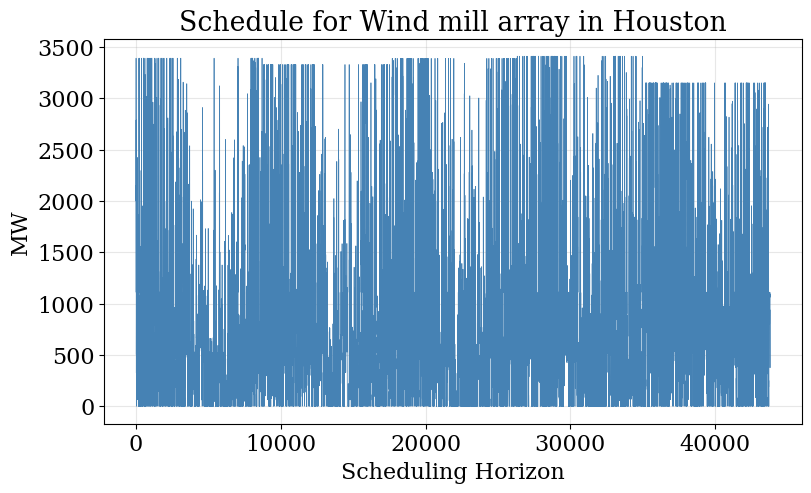

In [125]:

plot_results.schedule(results=results_cost, y_axis='P', component='WF',
                      location='HO', fig_size=(9, 5), color='steelblue')


![Schdule for WF](plots/sch_wf.png)

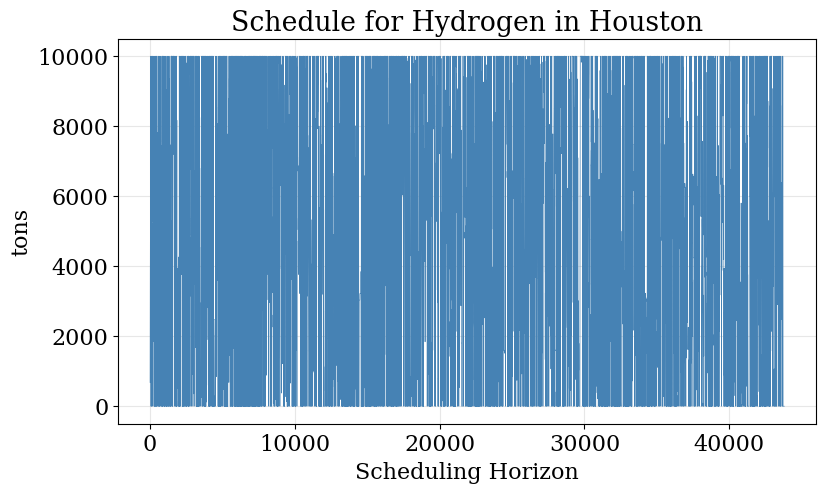

In [126]:

plot_results.schedule(results=results_cost, y_axis='Inv', component='H2_L',
                      location='HO', fig_size=(9, 5), color='steelblue')

![Schdule for H2_L](plots/sch_h2l.png)

In [127]:
results_cost.output['Cap_P']

{('HO', 'AqOff', 0): 183.80476053606372,
 ('HO', 'AqOff', 1): 247.65307360880095,
 ('HO', 'AqOff', 2): 188.2900798803821,
 ('HO', 'AqOff', 3): 236.6921972347228,
 ('HO', 'AqOff', 4): 210.3566402501315,
 ('HO', 'DAC', 0): 0.0,
 ('HO', 'DAC', 1): 0.0,
 ('HO', 'DAC', 2): 0.0,
 ('HO', 'DAC', 3): 0.0,
 ('HO', 'DAC', 4): 0.0,
 ('HO', 'H2_L_c', 0): 1493.0426734453945,
 ('HO', 'H2_L_c', 1): 1452.4383373573016,
 ('HO', 'H2_L_c', 2): 1491.8425326236988,
 ('HO', 'H2_L_c', 3): 1505.6748479249047,
 ('HO', 'H2_L_c', 4): 1335.4794173056869,
 ('HO', 'H2_L_d', 0): 1000.0,
 ('HO', 'H2_L_d', 1): 1000.0,
 ('HO', 'H2_L_d', 2): 1000.0,
 ('HO', 'H2_L_d', 3): 1000.0,
 ('HO', 'H2_L_d', 4): 1000.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'LiI', 1): 0.0,
 ('HO', 'LiI', 2): 0.0,
 ('HO', 'LiI', 3): 0.0,
 ('HO', 'LiI', 4): 0.0,
 ('HO', 'NGCC', 0): 651.4434185222887,
 ('HO', 'NGCC', 1): 877.7355080942796,
 ('HO', 'NGCC', 2): 667.3403504532416,
 ('HO', 'NGCC', 3): 838.8878158239336,
 ('HO', 'NGCC', 4): 745.5489642039041,
 ('

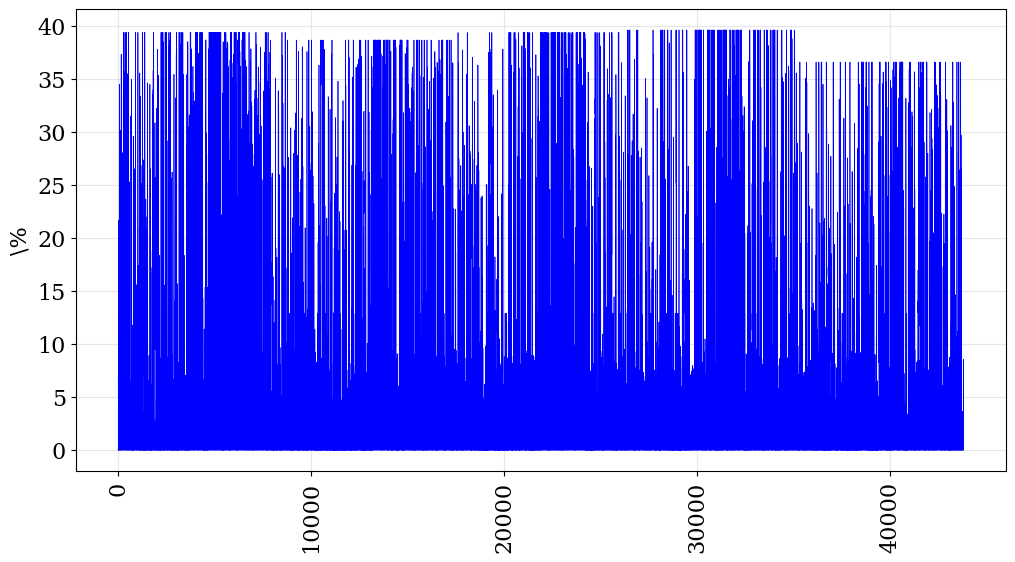

In [128]:
plot_results.capacity_utilization(results= results_cost, location='HO', process='PV')

In [129]:
scenario.process_set

{AqOff, DAC, H2_L_c, H2_L_d, LiI, NGCC, PEM, PSH, PV, SMR, SMRH, WF}